NETFLIX ANALYSIS
This project focuses on performing an exploratory data analysis (EDA) on the Netflix dataset sourced from Kaggle, aiming to understand the data and uncover meaningful insights. The process involved data cleaning and preprocessing, including handling missing values, removing unnecessary columns, and ensuring overall data consistency. After preparing the dataset, I conducted descriptive analysis to explore trends related to content type, genre, release year, and country of production. The results were visualized using various data visualization techniques such as bar charts,count plots and heatmap for better interpretation. This project primarily emphasizes data understanding and visualization, without applying any machine learning models.

IMPORTING ALL LIBRARIES & DATA LOADING AND EXPLORATION

In [5]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#creating a dataframe
df = pd.read_csv("D:/Data_analysis/Netflix/netflix_raw.csv")

In [7]:
#looking into the first 5 values
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
#checking how many rows & columns does this dataset has
df.shape

(8807, 12)

In [9]:
#Getting the info about dataset like what types are and does it have null values in it + memory usage as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
#works with only numeric column , if want for all types use include = all
#gives the descriptive statistics of the columns 
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
#gives the sum of all null values in that dataset 
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
#checking whether the dataset has any duplicate values. And this dataset has no duplicates
df['show_id'].duplicated().any()

False

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


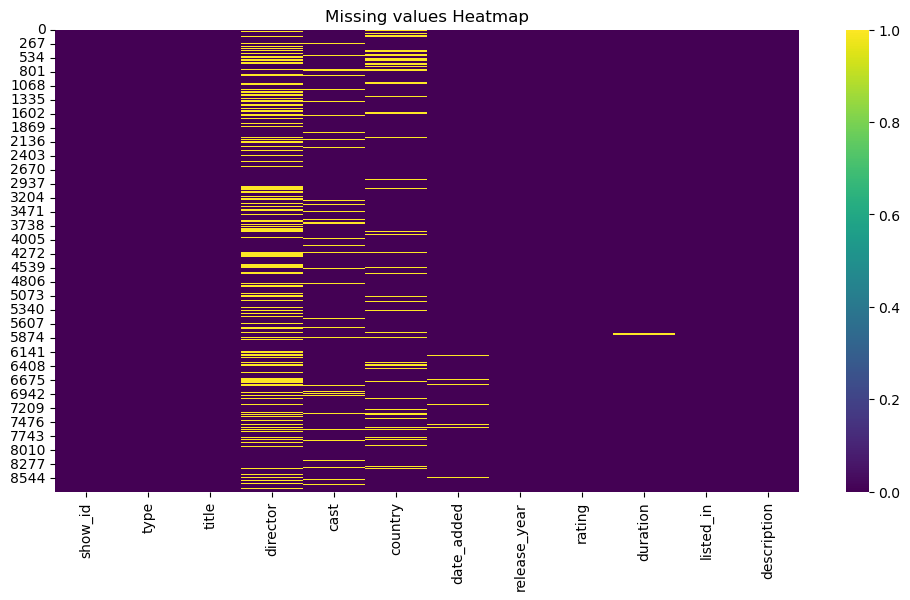

In [17]:
#Heaptmap for visual understanding abt dataset
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar= 'False', cmap ='viridis')
plt.title("Missing values Heatmap")
plt.show()

DATA CLEANING AND PREPROCESSING

In [14]:
#converting object datatype into datetime , cause it date column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [19]:
#missing values 
#filling in the missing values of this particular column with "missing" word as it is a text column
df["director"] = df["director"].fillna('missing')

In [20]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       98
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [21]:
#filling all the null values with "missing"
df["cast"] = df["cast"].fillna("missing")
df["country"] = df["country"].fillna("missing")
df["rating"] = df["rating"].fillna("missing")
df["duration"] = df["duration"].fillna("missing")

In [22]:
#filling the date column with "0"
df["date_added"] = df["date_added"].fillna(0)

In [23]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
#Checking how many unique values are there in each column 
df.nunique()

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          749
date_added      1700
release_year      74
rating            18
duration         221
listed_in        514
description     8775
dtype: int64

DESCRIPTIVE ANALYSIS AND DATA VISUALIZATION

In [11]:
#used include = all in describe function
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


C:\Users\Ramya\AppData\Local\Temp\ipykernel_12584\2974010002.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = "type", palette='Set2')


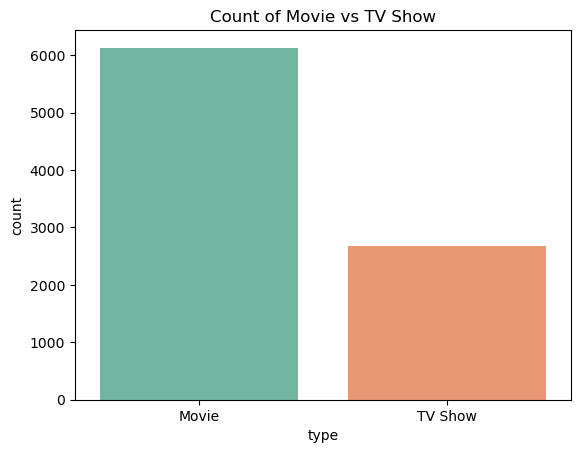

In [25]:
#Difference between the number of movie vs tv shows and visualliy representing them
#The number of movies is higher 
sns.countplot(data=df, x = "type", palette='Set2')
plt.title("Count of Movie vs TV Show")
plt.show()

C:\Users\Ramya\AppData\Local\Temp\ipykernel_12584\705200547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_countries.values, y = top_countries.index, palette ="coolwarm")


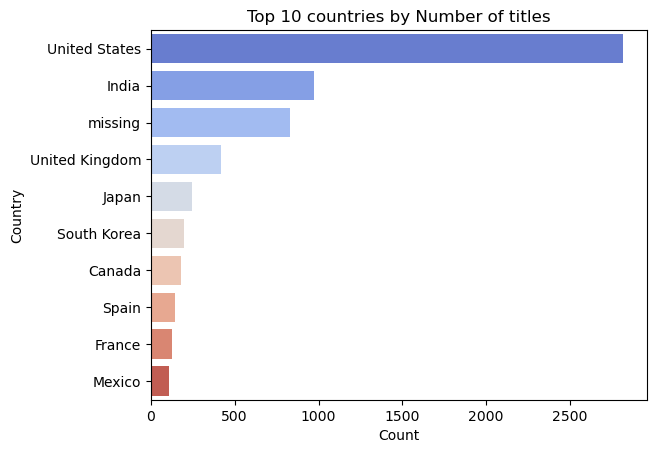

In [26]:
#Top 10 countries based on how many number of titles they have
#USA - tops the list(includes all types)
top_countries = df["country"].value_counts().head(10)
sns.barplot(x = top_countries.values, y = top_countries.index, palette ="coolwarm")
plt.title("Top 10 countries by Number of titles")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

C:\Users\Ramya\AppData\Local\Temp\ipykernel_12584\959066330.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="rating", data=df, order=df["rating"].value_counts().index, palette="viridis")


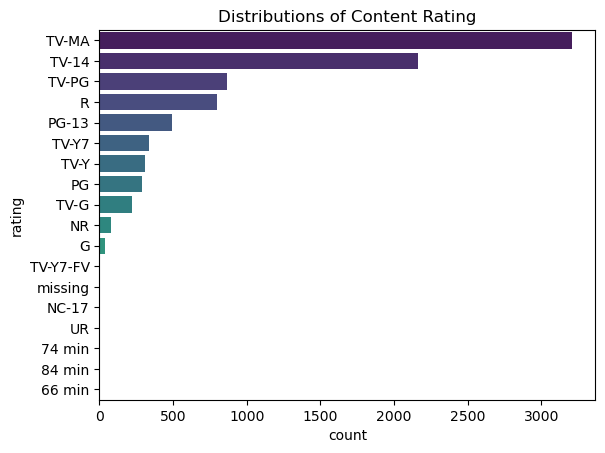

In [27]:
#distributions of content rating
#TV-MA stands the top of list(Age range - Adult and not suitable for children under age 17)
sns.countplot(y="rating", data=df, order=df["rating"].value_counts().index, palette="viridis")
plt.title("Distributions of Content Rating")
plt.show()

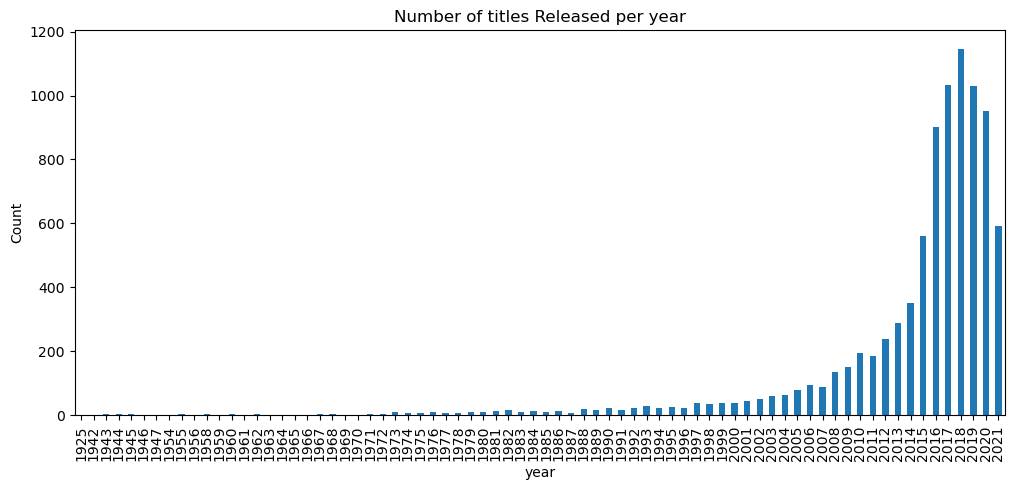

<Figure size 640x480 with 0 Axes>

In [28]:
#checking how the releases of all types are looking over years
#Turns out - from 2016 - 2020 they had good range of releases, especially 2018 is the peak
plt.figure(figsize=(12,5))
ax = df['release_year'].value_counts().sort_index().plot(kind="bar")
plt.title("Number of titles Released per year")
plt.xlabel("year")
plt.ylabel("Count")
plt.show()

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for label in ax.xaxis.get_ticklabels()[::2]:  # show every 2nd label
    label.set_visible(False)

plt.tight_layout()
plt.show()

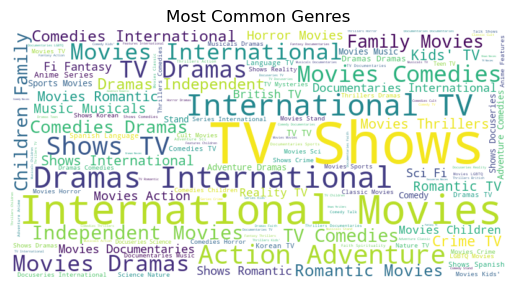

In [29]:
#Different way of visual representing of which genres are more common among the types 
from wordcloud import WordCloud

text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Genres')
plt.show()


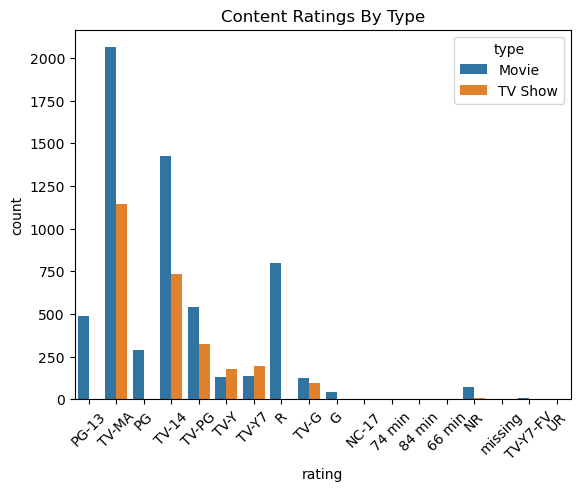

In [30]:
#Visually showing the content ratings by type , 
sns.countplot(data = df, x="rating", hue="type")
plt.title("Content Ratings By Type")
plt.xticks(rotation=45)
plt.show()


In [68]:
#Encoding all the categorical columns into Numerical columns for the next set of analysis
df_encoded = pd.get_dummies(df, columns=["type", "rating", "country"])

In [32]:
""""from collections import Counter
import itertools

genres = list(itertools.chain(*df['listed_in'].dropna().apply(lambda x: x.split(', '))))
genre_counts = Counter(genres).most_common(10)
sns.barplot(x=[count for genre, count in genre_counts], y=[genre for genre, count in genre_counts])
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
"""

'"from collections import Counter\nimport itertools\n\ngenres = list(itertools.chain(*df[\'listed_in\'].dropna().apply(lambda x: x.split(\', \'))))\ngenre_counts = Counter(genres).most_common(10)\nsns.barplot(x=[count for genre, count in genre_counts], y=[genre for genre, count in genre_counts])\nplt.title(\'Top 10 Most Common Genres\')\nplt.xlabel(\'Count\')\nplt.ylabel(\'Genre\')\nplt.show()\n'